<a href="https://colab.research.google.com/github/mgersins-design/Machine-Learning/blob/main/HW4/SVM_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

breast_input = pd.DataFrame(breast_data)
breast_input.head()

breast_labels = breast.target
breast_labels.shape

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels
breast_dataset.head()

breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)
breast_dataset.tail()

/tmp/ipython-input-2999754515.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign', inplace=True)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [ ]:
X = breast_dataset.drop(columns='label', axis=1).values
Y = breast_dataset['label'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
C = [1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e9]

for c in C:
    svm_rbf = SVC(kernel='rbf', C=c, gamma=0.1)
    svm_lin = SVC(kernel='linear', C=c)
    svm_poly = SVC(kernel='poly', C=c, degree=2)
    y_rbf = svm_rbf.fit(X_train, Y_train).predict(X_test)
    y_lin = svm_lin.fit(X_train, Y_train).predict(X_test)
    y_poly = svm_poly.fit(X_train, Y_train).predict(X_test)

    print('C:', c)
    print('RBF Training accuracy:', svm_rbf.score(X_train, Y_train))
    print('RBF Test accuracy:', svm_rbf.score(X_test, Y_test))
    print('LIN Training accuracy:', svm_lin.score(X_train, Y_train))
    print('LIN Test accuracy:', svm_lin.score(X_test, Y_test))
    print('POLY Training accuracy:', svm_poly.score(X_train, Y_train))
    print('POLY Test accuracy:', svm_poly.score(X_test, Y_test))
    print('')

C: 0.01
RBF Training accuracy: 0.6285714285714286
RBF Test accuracy: 0.6228070175438597
LIN Training accuracy: 0.967032967032967
LIN Test accuracy: 0.9736842105263158
POLY Training accuracy: 0.6571428571428571
POLY Test accuracy: 0.6666666666666666

C: 0.1
RBF Training accuracy: 0.9714285714285714
RBF Test accuracy: 0.9473684210526315
LIN Training accuracy: 0.9824175824175824
LIN Test accuracy: 0.9824561403508771
POLY Training accuracy: 0.7604395604395604
POLY Test accuracy: 0.7719298245614035

C: 1
RBF Training accuracy: 0.9934065934065934
RBF Test accuracy: 0.9649122807017544
LIN Training accuracy: 0.9868131868131869
LIN Test accuracy: 0.956140350877193
POLY Training accuracy: 0.865934065934066
POLY Test accuracy: 0.8070175438596491

C: 100.0
RBF Training accuracy: 1.0
RBF Test accuracy: 0.9649122807017544
LIN Training accuracy: 0.9978021978021978
LIN Test accuracy: 0.9210526315789473
POLY Training accuracy: 0.9714285714285714
POLY Test accuracy: 0.8508771929824561

C: 1000.0
RBF Tra

In [ ]:
# collecting the c values for each kernel with the highest test accuracy:

svm_rbf = SVC(kernel='rbf', C=1, gamma=0.001)     # RBF: c >= 1, best gamma is 1e-3
svm_lin = SVC(kernel='linear', C=0.1)           # LIN: c = 0.1
svm_poly = SVC(kernel='poly', C=1e3, degree=3)  # POLY: c >= 1e3, best degree is 3 -> no overfitting/underfitting

y_rbf = svm_rbf.fit(X_train, Y_train).predict(X_test)
y_lin = svm_lin.fit(X_train, Y_train).predict(X_test)
y_poly = svm_poly.fit(X_train, Y_train).predict(X_test)

In [ ]:
from sklearn import metrics
positive_label = 'Malignant'

print("---RBF-Kernel---")
print(f"Accuracy: {metrics.accuracy_score(Y_test, y_rbf)}")
print(f"Precision: {metrics.precision_score(Y_test, y_rbf, pos_label=positive_label)}")
print(f"Recall: {metrics.recall_score(Y_test, y_rbf, pos_label=positive_label)}")
print(f"F1: {metrics.f1_score(Y_test, y_rbf, pos_label=positive_label)}")
print()

print("---LIN-Kernel---")
print(f"Accuracy: {metrics.accuracy_score(Y_test, y_lin)}")
print(f"Precision: {metrics.precision_score(Y_test, y_lin, pos_label=positive_label)}")
print(f"Recall: {metrics.recall_score(Y_test, y_lin, pos_label=positive_label)}")
print(f"F1: {metrics.f1_score(Y_test, y_lin, pos_label=positive_label)}")
print()

print("---POLY-Kernel---")
print(f"Accuracy: {metrics.accuracy_score(Y_test, y_poly)}")
print(f"Precision: {metrics.precision_score(Y_test, y_poly, pos_label=positive_label)}")
print(f"Recall: {metrics.recall_score(Y_test, y_poly, pos_label=positive_label)}")
print(f"F1: {metrics.f1_score(Y_test, y_poly, pos_label=positive_label)}")

---RBF-Kernel---
Accuracy: 0.9649122807017544
Precision: 0.9466666666666667
Recall: 1.0
F1: 0.9726027397260274

---LIN-Kernel---
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
F1: 0.9861111111111112

---POLY-Kernel---
Accuracy: 0.9385964912280702
Precision: 0.9444444444444444
Recall: 0.9577464788732394
F1: 0.951048951048951


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix_rbf = confusion_matrix(Y_test, y_rbf)
cnf_matrix_lin = confusion_matrix(Y_test, y_lin)
cnf_matrix_poly = confusion_matrix(Y_test, y_poly)

print("---RBF-Kernel---")
print(cnf_matrix_rbf)
print()

print("---LIN-Kernel---")
print(cnf_matrix_lin)
print()

print("---POLY-Kernel---")
print(cnf_matrix_poly)

---RBF-Kernel---
[[39  4]
 [ 0 71]]

---LIN-Kernel---
[[41  2]
 [ 0 71]]

---POLY-Kernel---
[[39  4]
 [ 3 68]]


Text(0.5, 427.9555555555555, 'Predicted label')

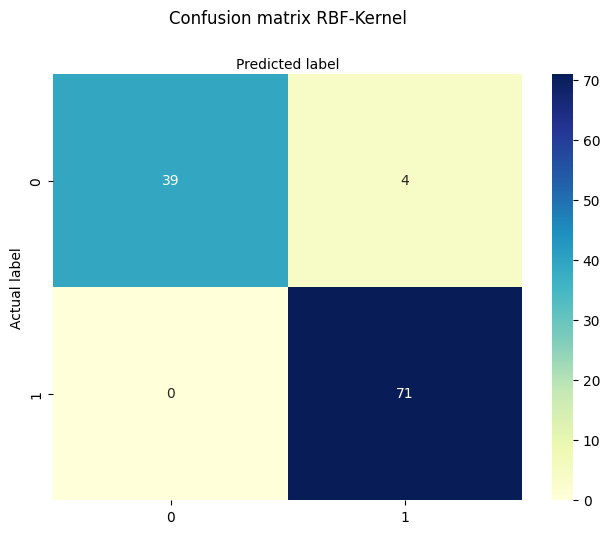

In [ ]:
# Visualization SVM Confusion_Matrix with RBF-Kernel
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rbf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RBF-Kernel', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

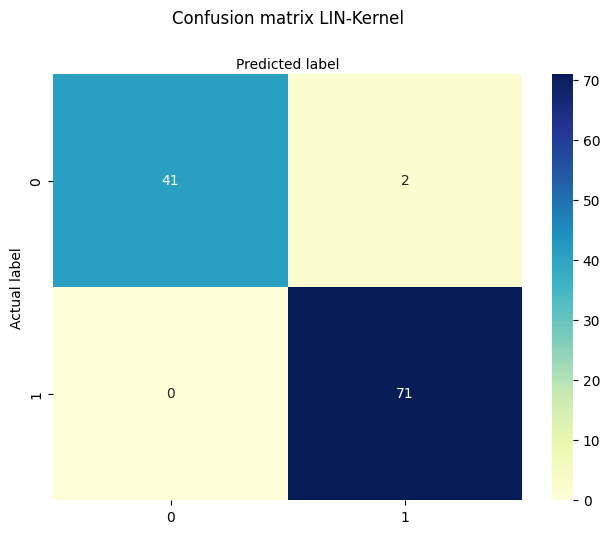

In [ ]:
# Visualization SVM Confusion_Matrix with LIN-Kernel
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lin), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix LIN-Kernel', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

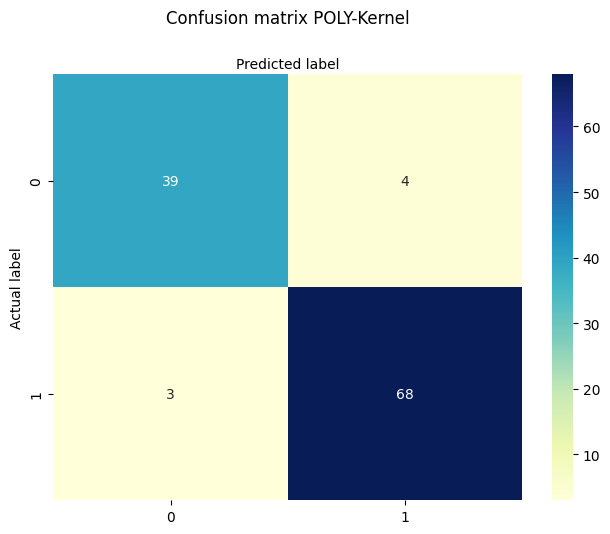

In [ ]:
# Visualization SVM Confusion_Matrix with POLY-Kernel
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_poly), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix POLY-Kernel', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')